In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import pyplot
from scipy.stats import norm
import datetime as dt

In [3]:
Loans_df = pd.read_csv("Task 3 and 4_Loan_Data.csv")
Loans_df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [4]:
Loans_df.describe()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.974577e+06,1.461200,4159.677034,8718.916797,70039.901401,4.552800,637.557700,0.185100
std,2.293890e+06,1.743846,1421.399078,6627.164762,20072.214143,1.566862,60.657906,0.388398
min,1.000324e+06,0.000000,46.783973,31.652732,1000.000000,0.000000,408.000000,0.000000
25%,2.977661e+06,0.000000,3154.235371,4199.836020,56539.867903,3.000000,597.000000,0.000000
50%,4.989502e+06,1.000000,4052.377228,6732.407217,70085.826330,5.000000,638.000000,0.000000
75%,6.967210e+06,2.000000,5052.898103,11272.263740,83429.166133,6.000000,679.000000,0.000000
max,8.999789e+06,5.000000,10750.677810,43688.784100,148412.180500,10.000000,850.000000,1.000000


Text(0.5, 0, 'FICO')

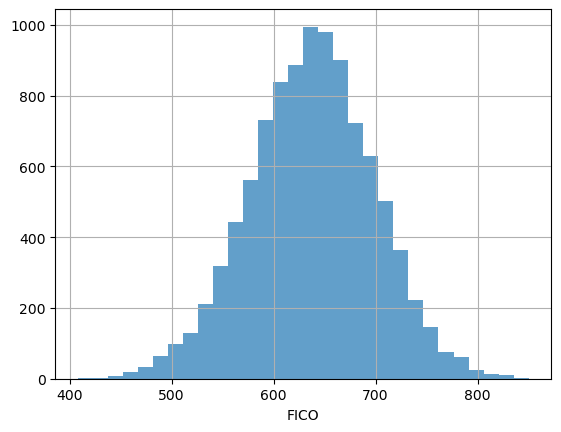

In [7]:
Loans_df['fico_score'].hist(bins=30,alpha=0.7,label='default=1')
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

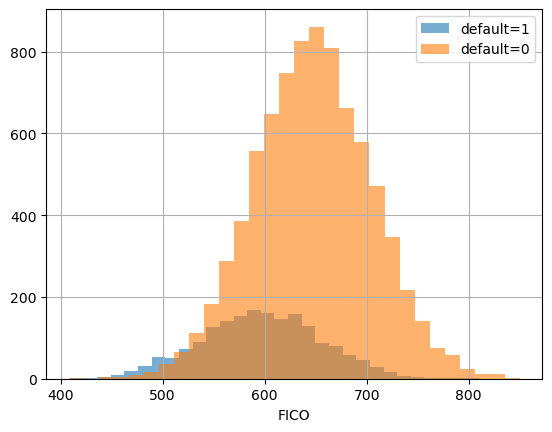

In [8]:
Loans_df[Loans_df['default']==1]['fico_score'].hist(bins=30,alpha=0.6,label='default=1')
Loans_df[Loans_df['default']==0]['fico_score'].hist(bins=30,alpha=0.6,label='default=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'income')

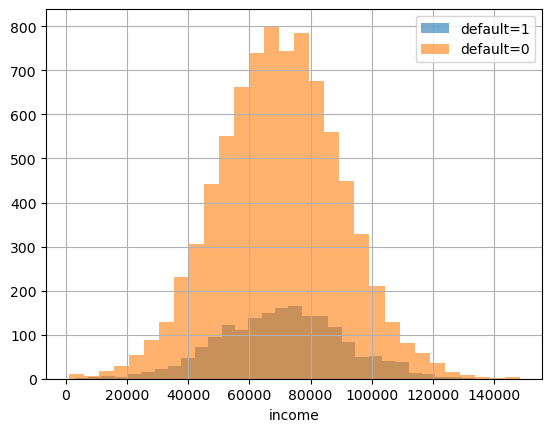

In [9]:
Loans_df[Loans_df['default']==1]['income'].hist(bins=30,alpha=0.6,label='default=1')
Loans_df[Loans_df['default']==0]['income'].hist(bins=30,alpha=0.6,label='default=0')
plt.legend()
plt.xlabel('income')

Text(0.5, 0, 'loan_amt_outstanding')

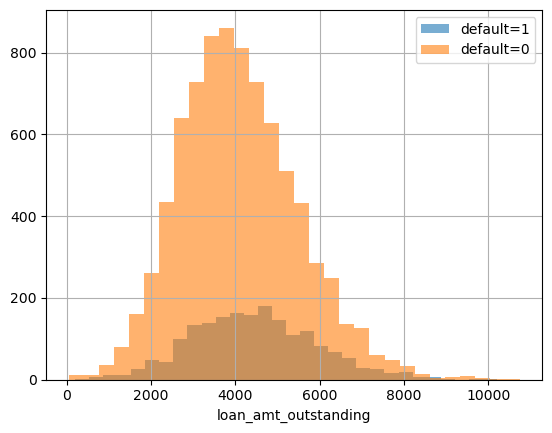

In [10]:
Loans_df[Loans_df['default']==1]['loan_amt_outstanding'].hist(bins=30,alpha=0.6,label='default=1')
Loans_df[Loans_df['default']==0]['loan_amt_outstanding'].hist(bins=30,alpha=0.6,label='default=0')
plt.legend()
plt.xlabel('loan_amt_outstanding')

Text(0.5, 0, 'loan_amt_outstanding')

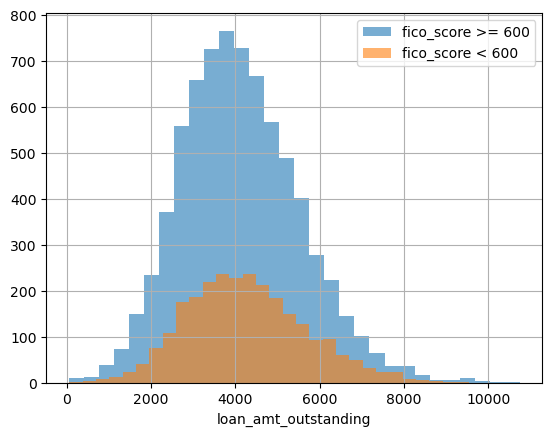

In [11]:
Loans_df[Loans_df['fico_score']>=600]['loan_amt_outstanding'].hist(bins=30,alpha=0.6,label='fico_score >= 600')
Loans_df[Loans_df['fico_score']<600]['loan_amt_outstanding'].hist(bins=30,alpha=0.6,label='fico_score < 600')
plt.legend()
plt.xlabel('loan_amt_outstanding')

In [15]:
import plotly.express as px

df = Loans_df.groupby('years_employed')['years_employed'].count().reset_index(name='count').sort_values('years_employed', ascending=True)

custom_colors = px.colors.qualitative.Set1[:len(df)]

fig = px.bar(df, x='years_employed', y='count', labels={'count': 'Count', 'years_employed': 'Years Employed'},
             color='years_employed', color_discrete_sequence=custom_colors)

fig.update_layout(title='Total Employee Length', xaxis_title='Years Employed', yaxis_title='Count')

fig.show()



In [18]:
df = Loans_df.groupby('credit_lines_outstanding')['credit_lines_outstanding'].count().reset_index(name='count').sort_values('credit_lines_outstanding', ascending=True)

fig = px.bar(df, x='credit_lines_outstanding', y='count', labels={'count': 'Count', 'credit_lines_outstanding': 'Credit Lines Outstanding'})


fig.update_layout(title='Credit Lines Outstanding', xaxis_title='Credit Lines Outstanding', yaxis_title='Count')

fig.update_xaxes(tickangle=30)


fig.show()


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, roc_auc_score

In [20]:
X = Loans_df.drop(['default'], axis=1)
Y = Loans_df['default']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.6, random_state=123)
from sklearn.linear_model import LogisticRegression
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(Y_train))
lr_preds = clf_logistic.predict_proba(X_test)
lr_preds_df = pd.DataFrame(lr_preds[:,1][0:], columns = ['lr_pred_PD'])
true_df = Y_test
print(pd.concat([true_df.reset_index(drop = True), lr_preds_df], axis = 1))

      default    lr_pred_PD
0           0  1.921734e-01
1           0  3.158185e-03
2           0  8.000909e-06
3           0  5.715340e-04
4           0  1.011595e-02
...       ...           ...
5995        0  5.924701e-07
5996        0  1.458246e-05
5997        0  1.692841e-02
5998        0  6.280748e-07
5999        0  7.617720e-01

[6000 rows x 2 columns]


In [21]:
import math
lr_preds_df.round(decimals=2).value_counts()

lr_pred_PD
0.00          4441
1.00           734
0.01           131
0.99            73
0.02            47
              ... 
0.39             1
0.40             1
0.79             1
0.44             1
0.74             1
Name: count, Length: 99, dtype: int64

In [22]:
Y_test.value_counts()

default
0    4932
1    1068
Name: count, dtype: int64

In [23]:
lr_preds_df['lr_pred_loan_status_60'] = lr_preds_df['lr_pred_PD'].apply(lambda x: 1 if x > 0.60 else 0)
print("Non-Default / Default predictions at 60% Threshhold: ")
print(lr_preds_df['lr_pred_loan_status_60'].value_counts())

Non-Default / Default predictions at 60% Threshhold: 
lr_pred_loan_status_60
0    4966
1    1034
Name: count, dtype: int64


In [24]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix at 60% Threshhold: ")
print(confusion_matrix(Y_test, lr_preds_df['lr_pred_loan_status_60']))

Confusion Matrix at 60% Threshhold: 
[[4898   34]
 [  68 1000]]


In [25]:
from sklearn.metrics import classification_report
target_names = ['Non-Default', 'Default']
print(classification_report(Y_test, lr_preds_df['lr_pred_loan_status_60'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.99      0.99      0.99      4932
     Default       0.97      0.94      0.95      1068

    accuracy                           0.98      6000
   macro avg       0.98      0.96      0.97      6000
weighted avg       0.98      0.98      0.98      6000



In [26]:
print(clf_logistic.score(X_test, Y_test))

0.9835


In [34]:
import xgboost as xgb
Loans_df = pd.read_csv("Task 3 and 4_Loan_Data.csv")
X = Loans_df.drop(['default'], axis=1)
Y = Loans_df['default']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=123)
model = xgb.XGBClassifier()
clf_xgbt = model.fit(X_train, np.ravel(Y_train))
xgbt_preds = clf_xgbt.predict_proba(X_test)
xgbt_preds_df = pd.DataFrame(xgbt_preds[:,1][0:], columns = ['xgbt_pred_PD'])
true_df = Y_test
print(pd.concat([true_df.reset_index(drop = True), xgbt_preds_df], axis = 1))

      default  xgbt_pred_PD
0           0      0.029665
1           0      0.000056
2           0      0.000002
3           0      0.000012
4           0      0.000077
...       ...           ...
2995        0      0.000043
2996        1      0.999410
2997        0      0.000028
2998        0      0.000003
2999        1      0.999972

[3000 rows x 2 columns]


In [35]:
xgbt_preds_df['xgbt_pred_loan_status_60'] = xgbt_preds_df['xgbt_pred_PD'].apply(lambda x: 1 if x > 0.60 else 0)
print("Non-Default / Default  predictions at 60% Threshhold: ")
print(xgbt_preds_df['xgbt_pred_loan_status_60'].value_counts())
print("Confusion Matrix at 60% Threshhold: ")
print(confusion_matrix(Y_test, xgbt_preds_df['xgbt_pred_loan_status_60']))
target_names = ['Non-Default', 'Default']
print(classification_report(Y_test, xgbt_preds_df['xgbt_pred_loan_status_60'], target_names=target_names))


Non-Default / Default  predictions at 60% Threshhold: 
xgbt_pred_loan_status_60
0    2475
1     525
Name: count, dtype: int64
Confusion Matrix at 60% Threshhold: 
[[2466    6]
 [   9  519]]
              precision    recall  f1-score   support

 Non-Default       1.00      1.00      1.00      2472
     Default       0.99      0.98      0.99       528

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [36]:
xgbt_preds_df

,xgbt_pred_PD,xgbt_pred_loan_status_60
0,0.029665,0
1,0.000056,0
2,0.000002,0
3,0.000012,0
4,0.000077,0
...,...,...
2995,0.000043,0
2996,0.999410,1
2997,0.000028,0
2998,0.000003,0


In [37]:
Loans_df['default'].value_counts()

default
0    8149
1    1851
Name: count, dtype: int64

In [38]:
Loans_df.drop(['default'], axis=1,inplace=True)
Prob_to_default = clf_xgbt.predict_proba(Loans_df)
prob_data = pd.DataFrame(Prob_to_default[:,1][0:].round(decimals = 2), columns = ['Probability _to_Default'])
prob_data['Probability _to_Default'].apply(lambda x: 1 if x > 0.60 else 0).value_counts()

Probability _to_Default
0    8152
1    1848
Name: count, dtype: int64

In [39]:
Loans_df=pd.concat([Loans_df, prob_data], axis = 1)
recovery_rate = 0.1  
Loans_df['lgd'] = (1 - recovery_rate) * Loans_df['loan_amt_outstanding']

Loans_df['expected_loss'] = Loans_df['Probability _to_Default'] * Loans_df['lgd']
Loans_df.sort_values('expected_loss',ascending=False)

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,Probability _to_Default,lgd,expected_loss
1997,6597386,5,10210.746690,33515.971170,107870.38960,2,649,1.0,9189.672021,9189.672021
2138,1998635,5,9563.693515,28825.601850,112120.62640,3,641,1.0,8607.324164,8607.324164
9203,4836461,5,9105.964213,42558.451490,133913.38230,3,601,1.0,8195.367792,8195.367792
9944,3983392,4,8989.178801,30103.662560,124197.63370,2,641,1.0,8090.260921,8090.260921
5460,2527305,5,8841.923630,32644.921580,115203.15190,2,541,1.0,7957.731267,7957.731267
...,...,...,...,...,...,...,...,...,...,...
3687,4362545,0,3187.789761,2868.594545,52748.12582,4,669,0.0,2869.010785,0.000000
3686,2432468,0,3570.845462,3645.659263,67239.68452,4,644,0.0,3213.760916,0.000000
3685,1799861,0,2528.033133,2129.209250,43442.20361,5,728,0.0,2275.229820,0.000000
3684,7530508,0,2614.065745,1530.457376,34018.83834,3,542,0.0,2352.659171,0.000000
